# How can a Wellness Company play it smart?
[![logo.png](https://i.postimg.cc/fbzCVt3C/logo.png)](https://postimg.cc/ZWQpgqxv)

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products for women.
Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned
itself as a tech-driven wellness company for women.

By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available
through a growing number of online retailers in addition to their own e-commerce channel on their website. 

# Ask 
**1. Business Task**

Bellabeat have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company.


**2. Key Questions**

* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

Then, based on the trends, make like high-level recommendations for Bellabeat’s marketing strategy.


# Prepare

**1. Data Source**

[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit/data) kaggle public data set is used to explore smart device users’ daily habits. This data set contains personal fitness tracker from thirty fitbit users.

The data was collected between 03.12.2016-05.12.2016 from fitbit users with consent as a part of survey and is avilable in the pulic domain, hence we can conclude that the data source is credible.

Diving into the data:

The data contains information related to daily activities, calories, intensities, steps, heart rate, sleep and weight related data in long format containing numerous rows.

In order to prepare the data first let's start with installing and loading the packages. 




In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Read the files
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
hourly_intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_steps <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

In [3]:
#Observe the data
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


# Process

In [4]:
#check unique participants in each dataset

n_distinct(daily_activity$Id)
n_distinct(sleep_day$Id)
n_distinct(weight$Id)

[1] 33

[1] 24

[1] 8

Since weight data frame has only 8 unique participants, will skip this for my analysis as the data is not sufficient to analyze the trends.

In [5]:
# First lets add a new date field to the sleep_day data field as date format in sleep_day is datetime. 
sleep_day$SleepDate <- format(as.POSIXct(sleep_day$SleepDay, format = "%m/%d/%Y %I:%M:%S %p", tz = "UTC"), "%-m/%-d/%Y")

# It will be convenient to merge sleep data frame to daily activity merged. 
# It will be best to merge the two data frames based on ID and date field.
merged_data <- merge(daily_activity, sleep_day, by.x = c('Id', 'ActivityDate'), by.y = c('Id', 'SleepDate'))
head(merged_data)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,4/19/2016 12:00:00 AM,1,304,320


# Analyze

In [6]:
#check the summary of data
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,VeryActiveMinutes,
         SedentaryMinutes, FairlyActiveMinutes, Calories) %>%
  summary()

sleep_day %>%
  select(TotalSleepRecords,
         TotalMinutesAsleep,
         TotalTimeInBed) %>%
  summary()

   TotalSteps    TotalDistance    VeryActiveMinutes SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :  0.00    Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:  0.00    1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :  4.00    Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 21.16    Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 32.00    3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :210.00    Max.   :1440.0  
 FairlyActiveMinutes    Calories   
 Min.   :  0.00      Min.   :   0  
 1st Qu.:  0.00      1st Qu.:1828  
 Median :  6.00      Median :2134  
 Mean   : 13.56      Mean   :2304  
 3rd Qu.: 19.00      3rd Qu.:2793  
 Max.   :143.00      Max.   :4900  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

* **Total Steps**: Daily steps average at 7600 steps ranging from lower to higher values.
* **Total distance**: The average distance covered per day is around 5 kms which varies between 2.6kms to 7.7kms.
* **Active Minutes**: Active minutes is observed to be on the lower end with the average of 21 minutes.
* **Sedentary minutes**: Most of the users have a high sedantary time of 17.6 hours per day on an average.
* **Calories Burned**: The average calories burned is around 2300 and ranges between 1828 to 2793 calories.
* **Sleep**: Typical sleep duration is observed to be around 7 hours.

# Share

Now, let's focus on some key trends.

**Total Steps vs Calories Burned:**

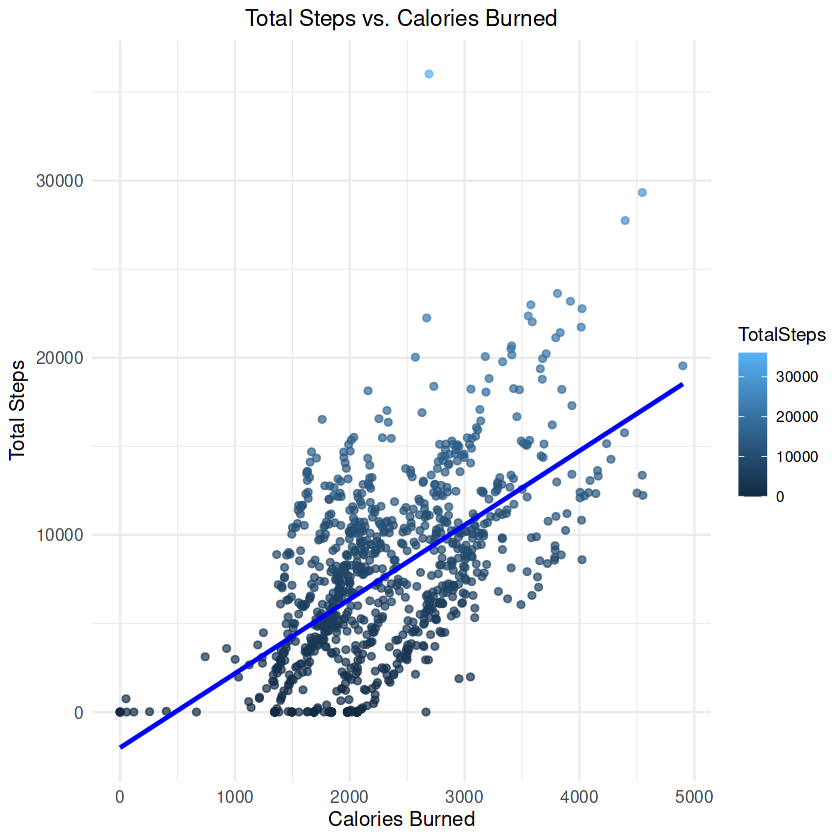

In [7]:
ggplot(data = daily_activity, aes(x = Calories, y = TotalSteps)) + 
  geom_point(aes(color = TotalSteps), alpha = 0.7) +  
  geom_smooth(method = "lm", formula = y ~ x, color = "blue", se = FALSE) + 
  labs(title = "Total Steps vs. Calories Burned",
       x = "Calories Burned",
       y = "Total Steps") +
  theme_minimal() + 
  theme(plot.title = element_text(hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10))

Higher calorie expenditure is generally associated with a greater number of steps taken. This suggests that users who are more active and burn more calories tend to walk more.

**Total Minutes Asleep vs Sedentary Minutes:**

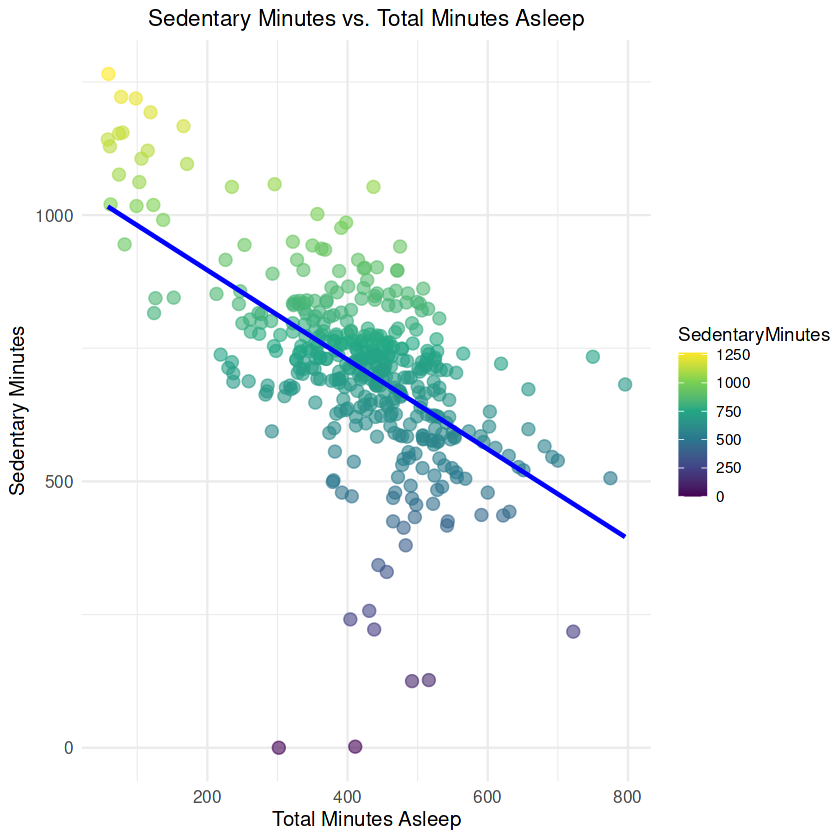

In [8]:
ggplot(data = merged_data, aes(x = TotalMinutesAsleep, y = SedentaryMinutes)) + 
  geom_point(aes(color = SedentaryMinutes), size = 3, alpha = 0.6) +
  geom_smooth(method = "lm", formula = y ~ x, color = "blue", se = FALSE) +
  labs(title = "Sedentary Minutes vs. Total Minutes Asleep",
       x = "Total Minutes Asleep",
       y = "Sedentary Minutes") +
  scale_color_viridis_c() +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10))


Users with more sleep tend to have varying levels of sedentary minutes. There’s no clear trend showing that more sleep directly affects sedentary time, indicating that factors other than sleep might be influencing sedentary behavior.

**Average total Steps vs Time of day:**

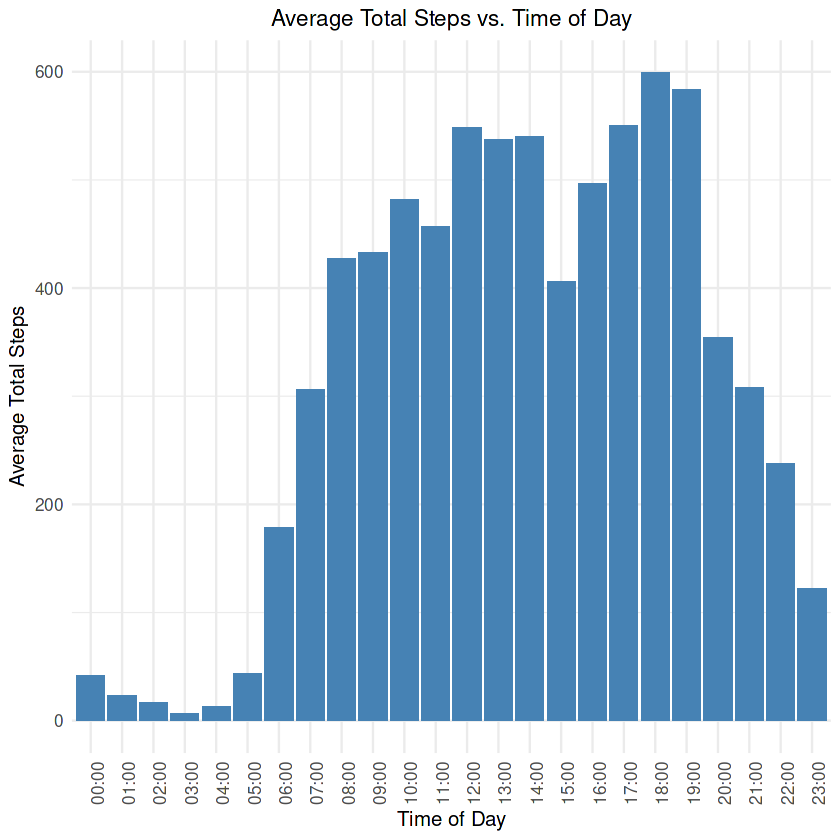

In [9]:
hourly_steps <- hourly_steps %>%
  mutate(ActivityTime = format(as.POSIXct(ActivityHour, format = "%m/%d/%Y %I:%M:%S %p"), "%H:%M"))

# Summarize data to calculate the mean total steps per time period
steps_summary <- hourly_steps %>%
  group_by(ActivityTime) %>%
  drop_na() %>%
  summarise(mean_total_steps = mean(StepTotal, na.rm = TRUE))

ggplot(data = steps_summary, aes(x = ActivityTime, y = mean_total_steps)) +
  geom_bar(stat = "identity", fill = 'steelblue') +
  labs(title = "Average Total Steps vs. Time of Day",
       x = "Time of Day",
       y = "Average Total Steps") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        plot.title = element_text(hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10))

The graph shows that most number of steps is averaged in the noon and in the evening post work. The peak is reached around 6PM-7PM.

# Act

[![bellabeat-1.png](https://i.postimg.cc/TYfBwL2N/bellabeat-1.png)](https://postimg.cc/s1HTH2h5)



**Marketing Suggestions to the Bellabeat team based on the trends:**

* Encourage users to reach a daily step goal of 10,000 steps, as many users are already close to this target. Create challenges or rewards for achieving this goal consistently.

* Promote short, high-intensity workout sessions to help users increase their very active minutes. Offering quick workout routines within the app could engage users who currently have low activity levels.

* Introduce reminders or prompts to stand up and move around after long periods of inactivity. This could help users break up their sedentary time throughout the day.

* Since sleep duration varies, provide personalized sleep improvement tips or bedtime routines within the app to help users achieve more consistent and restful sleep.

* Based on calorie burn and activity levels, offer custom fitness plans that match users current activity levels and encourage gradual progress.

* Use motivational messages and achievements to encourage consistent activity and engagement, helping users feel rewarded for their efforts even on less active days.